#### Mini Batch K-Means算法是K-Means算法的变种，采用小批量的数据子集减小计

#### 算时间。这里所谓的小批量是指每次训练算法时所随机抽取的数据子集，大大减小

#### 了计算时间，结果一般只是略差与标准算法 

In [1]:
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 载入数据
data = np.genfromtxt("KMeans.txt",delimiter="")
k = 4

In [3]:
# 训练模型
model = MiniBatchKMeans(n_clusters=k)
model.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [4]:
# 分类中心坐标
centers = model.cluster_centers_
print(centers)

[[-0.37295148 -0.4340566 ]
 [-1.19870655  0.24597413]
 [-1.37769663 -0.5320412 ]
 [-0.29061798  0.23237828]]


In [5]:
# 预测结果
result = model.predict(data)
print(result)

[1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1]


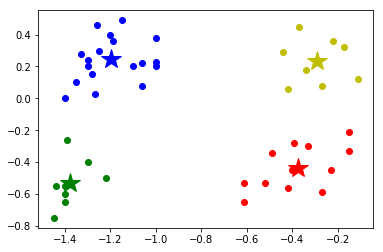

In [8]:
# 画出各个数据点，用不同的颜色
mark = ['or','ob','og','oy']
for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])
# 画出各个分类的中心点
mark = ['*r','*b','*g','*y']
for i,center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)
plt.show()

In [9]:
# 获取数据值所在的范围
x_min,x_max = data[:,0].min()-1,data[:,0].max() + 1
y_min,y_max = data[:,1].min()-1,data[:,1].max() + 1

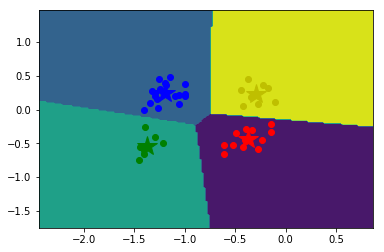

In [13]:
# 生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx,yy,z)
# 显示结果
# 画出各个数据点，用不同颜色表示分类
mark = ['or','ob','og','oy']
for i ,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])
    
#     画出各个分类的中心点
mark = ['*r','*b','*g','*y']
for i , center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)
plt.show()